In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()  

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()

False

In [5]:
(X_train,y_train),(X_test,y_test)= tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 82s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_train[0].shape

(32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

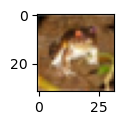

In [16]:
plot_sample(0)

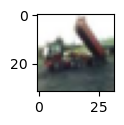

In [18]:
plot_sample(2)

In [19]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

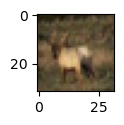

In [20]:
plot_sample(3)

In [22]:
y_train[3]

array([4], dtype=uint8)

In [23]:
classes[y_train[3][0]]

'deer'

In [27]:
#Scaling the images
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [28]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [29]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [32]:
#One Hot Encoding
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32')
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [35]:
X_train.shape

(50000, 32, 32, 3)

In [36]:
#Input layer size
32*32*3

3072

In [37]:
#y-train has descrete value
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [38]:
#y_train_categorical is One-Hot-Encoded so we use categorical_crossentropy
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
model = keras.Sequential([
    #Neural Network Layers: Flatten the Layer
    keras.layers.Flatten(input_shape=(32,32,3)),
    #Hidden Layer
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(1000,activation='relu'),
    #Output Layer : have 10 neurons because we have 10 classes
    keras.layers.Dense(10,activation='sigmoid')
    
])

model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8113 - accuracy: 0.3531
Epoch 2/50
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6261 - accuracy: 0.4249
Epoch 3/50
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5439 - accuracy: 0.4540
Epoch 4/50
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4824 - accuracy: 0.4771
Epoch 5/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4333 - accuracy: 0.4944
Epoch 6/50
1563/1563 [==============================] - 21s 14ms/step - loss: 1.3905 - accuracy: 0.5110
Epoch 7/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3502 - accuracy: 0.5253
Epoch 8/50
1563/1563 [==============================] - 21s 14ms/step - loss: 1.3177 - accuracy: 0.5374
Epoch 9/50
1563/1563 [==============================] - 21s 14ms/step - loss: 1.2851 - accuracy: 0.5474
Epoch 10/50
1563/1563 [==============================] - 21s 14m

In [50]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 [==============================] - 2s 5ms/step


'ship'

In [51]:
classes[y_test[1][0]]

'ship'

In [53]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 2s 5ms/step - loss: 1.6010 - accuracy: 0.5556


[1.6010305881500244, 0.5555999875068665]

In [54]:
#Performance Test
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(1000,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ])
    
    model.compile(optimizer='SGD',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical,epochs=1)